In [1]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Define the data
data = {
    "Outlook": ["Rainy", "Rainy", "Overcast", "Sunny", "Sunny", "Sunny", "Overcast", "Rainy", "Rainy", "Sunny", "Rainy", "Overcast"],
    "Temperature": ["Hot", "Hot", "Hot", "Mild", "Cool", "Cool", "Cool", "Mild", "Cool", "Mild", "Mild", "Mild"],
    "Humidity": ["High", "High", "High", "High", "Normal", "Normal", "Normal", "High", "Normal", "Normal", "Normal", "High"],
    "Windy": [False, True, False, False, False, True, True, False, False, False, True, True],
    "Play Golf": ["No", "No", "Yes", "Yes", "Yes", "No", "Yes", "No", "Yes", "Yes", "Yes", "Yes"]
}

df = pd.DataFrame(data)
df

,Outlook,Temperature,Humidity,Windy,Play Golf
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes
5,Sunny,Cool,Normal,True,No
6,Overcast,Cool,Normal,True,Yes
7,Rainy,Mild,High,False,No
8,Rainy,Cool,Normal,False,Yes
9,Sunny,Mild,Normal,False,Yes


In [3]:
df.shape

(12, 5)

In [4]:
df.columns

Index(['Outlook', 'Temperature', 'Humidity', 'Windy', 'Play Golf'], dtype='object')

In [5]:
# Encode categorical variables
label_encoder = LabelEncoder()

cols = [['Outlook', 'Temperature', 'Humidity', 'Windy']]
for col in cols:
    df[col] = df[col].apply(label_encoder.fit_transform)

In [6]:
df

,Outlook,Temperature,Humidity,Windy,Play Golf
0,1,1,0,0,No
1,1,1,0,1,No
2,0,1,0,0,Yes
3,2,2,0,0,Yes
4,2,0,1,0,Yes
5,2,0,1,1,No
6,0,0,1,1,Yes
7,1,2,0,0,No
8,1,0,1,0,Yes
9,2,2,1,0,Yes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Outlook      12 non-null     int64 
 1   Temperature  12 non-null     int64 
 2   Humidity     12 non-null     int64 
 3   Windy        12 non-null     int64 
 4   Play Golf    12 non-null     object
dtypes: int64(4), object(1)
memory usage: 612.0+ bytes


In [8]:
df.describe()

,Outlook,Temperature,Humidity,Windy
count,12.000000,12.000000,12.000000,12.000000
mean,1.083333,1.083333,0.500000,0.416667
std,0.792961,0.900337,0.522233,0.514929
min,0.000000,0.000000,0.000000,0.000000
25%,0.750000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.500000,0.000000
75%,2.000000,2.000000,1.000000,1.000000
max,2.000000,2.000000,1.000000,1.000000


Outlook


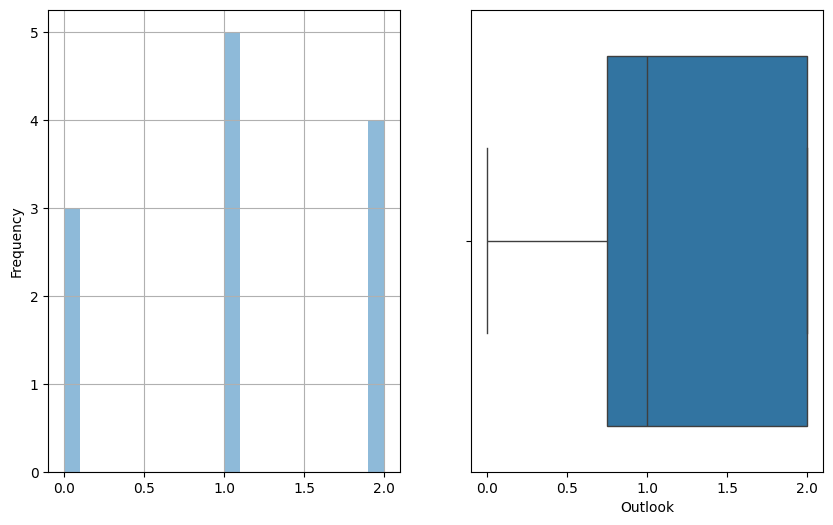

Temperature


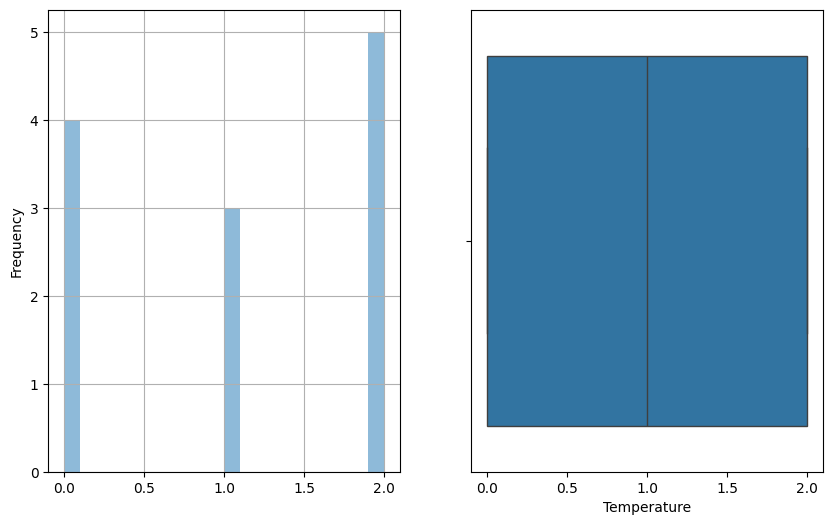

Humidity


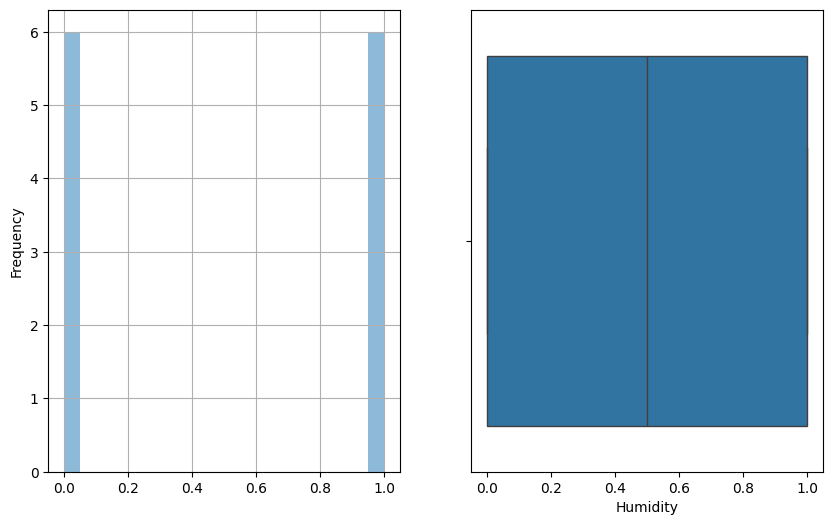

Windy


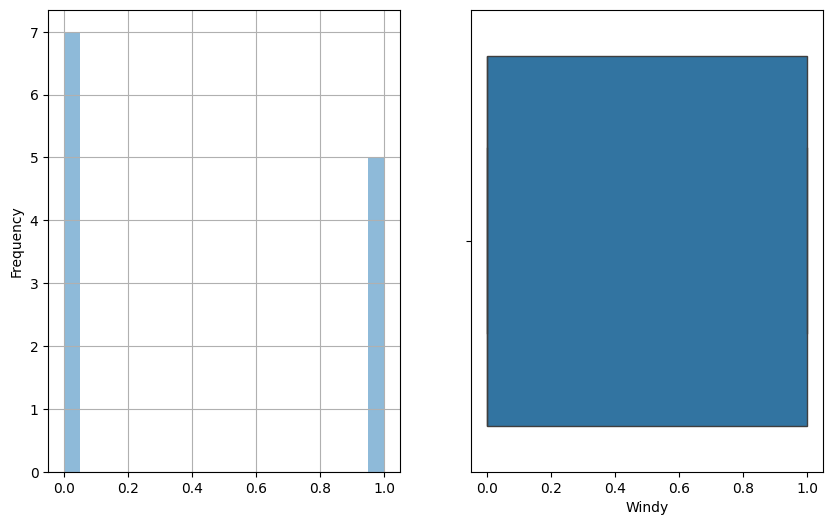

Play Golf


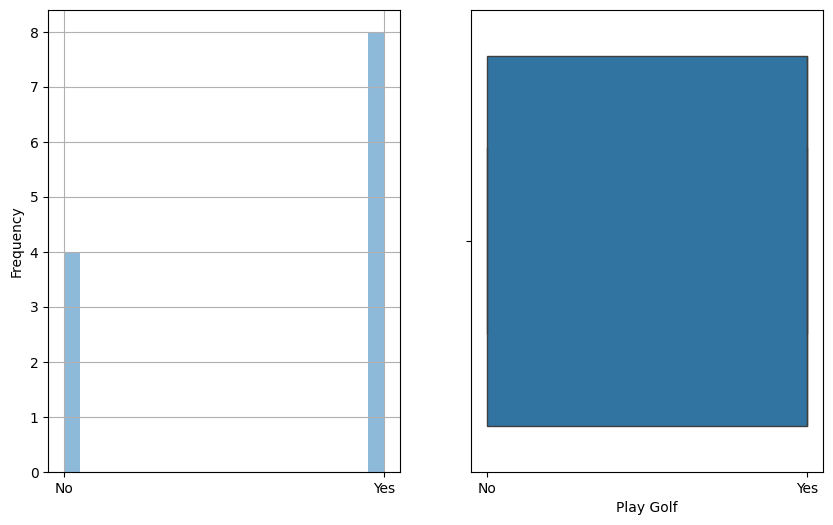

In [9]:
for col in df.columns:
    print(col)

    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    df[col].hist(bins=20,alpha=0.5)
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

In [10]:
X = df.drop(columns=['Play Golf'],axis=1)
y = df['Play Golf']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [12]:
model = GaussianNB()
model.fit(X_train, y_train)
model

GaussianNB()

In [13]:
y_test

10    Yes
9     Yes
0      No
8     Yes
5      No
Name: Play Golf, dtype: object

In [14]:
y_pred = model.predict(X_test)
y_pred

array(['Yes', 'Yes', 'No', 'Yes', 'Yes'], dtype='<U3')

In [15]:
accuracy_score = accuracy_score(y_pred, y_test)*100
accuracy_score

80.0

In [16]:
report = classification_report(y_pred, y_test)
print(report)

              precision    recall  f1-score   support

          No       0.50      1.00      0.67         1
         Yes       1.00      0.75      0.86         4

    accuracy                           0.80         5
   macro avg       0.75      0.88      0.76         5
weighted avg       0.90      0.80      0.82         5



In [17]:
X_test

,Outlook,Temperature,Humidity,Windy
10,1,2,1,1
9,2,2,1,0
0,1,1,0,0
8,1,0,1,0
5,2,0,1,1


In [18]:
new_data = [[0, 2, 0,1]]
y_pred = model.predict(new_data)
y_pred[0]

np.str_('Yes')